In [1]:
'''
    Source url :
    https://towardsdatascience.com/find-face-edges-in-20-lines-of-code-from-scratch-8058e128c013
'''
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math


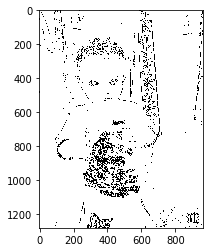

In [7]:
file_name = 'IMG-20190702-WA0005.jpg'
im = Image.open(file_name)
im_array = np.asarray(im)

# You can resize the image first if it is too big.
n = 2
im = im.resize((int(im.size[0]/n), int(im.size[1]/n)))

# square root difference between two pixels.
def sqrt_diff(a,b):    
    return math.sqrt( sum((int(a[i])-int(b[i]))**2 for i in range(3)) /3 )


diff_threshold = 25
new_array = np.copy(im_array)
for row in range(im_array.shape[0]-1):
    for col in range(im_array.shape[1]-1):
        # change an edge pixel to black if it is much different from neighbours (right and below)
        # otherwise change it to white as background
        if ( sqrt_diff(im_array[row,col],im_array[row,col+1]) > diff_threshold
            or sqrt_diff(im_array[row,col],im_array[row+1,col]) > diff_threshold):
            new_array[row,col] = [0,0,0] # black
        else:
            new_array[row,col] = [255,255,255] # white

plt.imshow(new_array)
plt.savefig('new1.png')

plt.imshow(new_array)
plt.show()
